<a href="https://colab.research.google.com/github/Freedisch/bitcoin-market-price/blob/main/Bitcoin_Market_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1, l2

In [4]:
file_path = 'BTC-USD3.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
1,2023-03-01,23150.929688,23880.632813,23088.626953,23646.550781,23646.550781,24662841200
2,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
4,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913


# ML Model Without Optmization Techniques

In [21]:

data['Date'] = pd.to_datetime(data['Date'])

target = data['Close'].values

features = data[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
features_normalized = scaler.fit_transform(features)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Generate the dataset with a window size (look_back) of 5 days
look_back = 5
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape


((288, 5, 1), (72, 5, 1))

In [19]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

test_loss = model.evaluate(X_test, y_test, verbose=0)

test_loss

0.08676866441965103

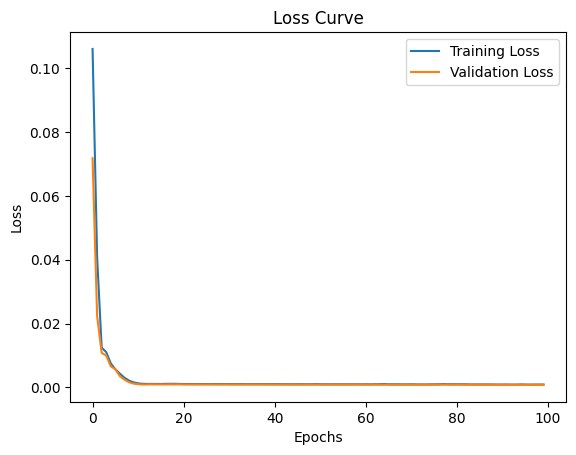

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [17]:
predicted_prices = model.predict(X_test)

# Invert normalization for a true performance measure
predicted_prices_inv = scaler.inverse_transform(predicted_prices)
actual_prices_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE
mse = mean_squared_error(actual_prices_inv, predicted_prices_inv)
print(f"Test MSE: {mse}")


7/7 [==============================] - 0s 1ms/step
Test MSE: 153018677.42696476


# L1 Regularization

In [31]:
# Sample data for preprocessing
look_back = 5
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

features_normalized = np.random.rand(1000, 1)  # Placeholder for normalized features
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), kernel_regularizer=l1(0.01)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.3855 - val_loss: 0.2322
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2130 - val_loss: 0.1797
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1779 - val_loss: 0.1513
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1512 - val_loss: 0.1282
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1303 - val_loss: 0.1097
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1157 - val_loss: 0.0977
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1073 - val_loss: 0.0922
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1030 - val_loss: 0.0885
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1006 - val_loss: 0.0857
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 0.0838
Epoch 11

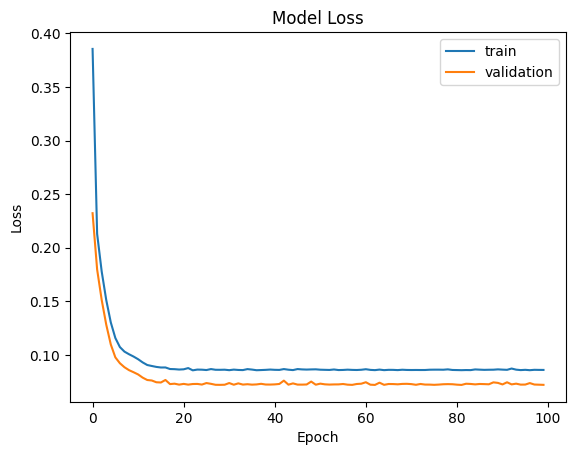

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# L2 Regularization Model

In [34]:
# Data preprocessing
look_back = 5
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

features_normalized = np.random.rand(1000, 1)
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), kernel_regularizer=l2(0.01)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 17ms/step - loss: 0.1733 - val_loss: 0.1046
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0983 - val_loss: 0.1006
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0925 - val_loss: 0.0963
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 0.0933
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 0.0913
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0860 - val_loss: 0.0904
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0844 - val_loss: 0.0900
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0836 - val_loss: 0.0898
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0832 - val_loss: 0.0875
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0822 - val_loss: 0.0872
Epoch 11

In [35]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

Test loss: 0.08280731737613678


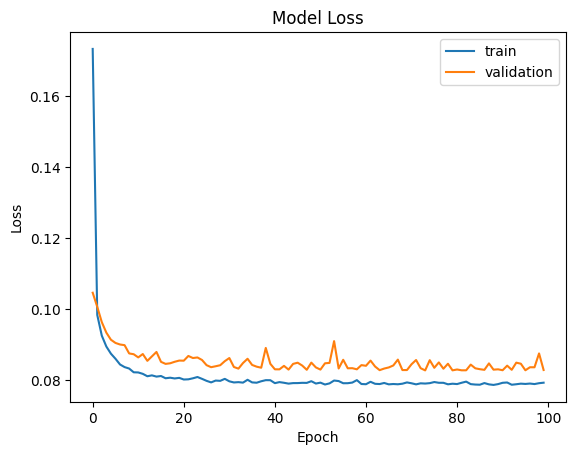

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Convolutional Neural Network

In [28]:
look_back = 5
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

features_normalized = np.random.rand(1000, 1)
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 0.1188 - val_loss: 0.0970
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0932 - val_loss: 0.0954
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0900 - val_loss: 0.0926
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0870 - val_loss: 0.0892
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0863 - val_loss: 0.0882
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0840 - val_loss: 0.0875
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0829 - val_loss: 0.0914
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0837 - val_loss: 0.0863
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0817 - val_loss: 0.0863
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0836 - val_loss: 0.0854
Epoch 11/

In [26]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

Test loss: 0.08019901812076569


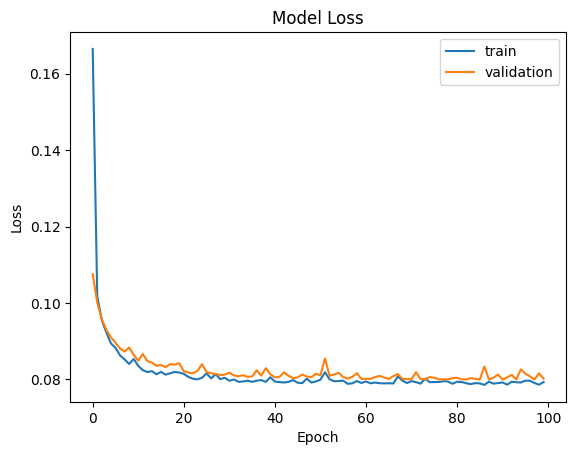

In [27]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()